In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-ultimate-earthquake-dataset-from-1990-2023/Eartquakes-1990-2023.csv


# About Dataset:
- The Earthquakes-1990-2023 dataset contains historical earthquake records spanning over three decades, providing valuable insights into seismic activity worldwide. This dataset likely includes key attributes such as the date, time, latitude, longitude, depth, magnitude, and location of each earthquake. Additional fields may include tectonic plate information, event type, and tsunami warnings if sourced from organizations like USGS or EMSC. Analyzing this dataset can help identify geographic hotspots, temporal trends, and correlations between depth and magnitude. It can also be used to build machine learning models for earthquake prediction, employing classification techniques to determine the likelihood of significant tremors or regression models to estimate earthquake magnitudes based on historical data. Understanding these patterns is crucial for disaster preparedness, risk assessment, and early warning systems.

- The Earthquake Prediction project you've outlined involves analyzing a large dataset with over 3.4 million entries and 12 columns.

 - Columns:
1. time: The timestamp of the earthquake event (int64).
2. place: Location of the earthquake (object).
3. status: Status of the earthquake event (object).
4. tsunami: Indicator if a tsunami was triggered (int64).
5. significance: Significance level of the earthquake (int64).
6. data_type: Type of data recorded (object).
7. magnitudo: Magnitude of the earthquake (float64).
8. state: State where the earthquake occurred (object).
9. longitude: Longitude of the earthquake (float64).
10. latitude: Latitude of the earthquake (float64).
11. depth: Depth of the earthquake in kilometers (float64).
12. date: The date of the earthquake event (object). 

- Classification: If predicting the likelihood of an earthquake happening,  treat it as a classification problem (e.g., earthquake occurrence vs. non-occurrence).

# steps:
- ✔ Data Preprocessing
- ✔ EDA (Exploratory Data Analysis)
- ✔ Feature Engineering (Outlier Removal, Label Encoding, Standardization)
- ✔ Classification Models (Random Forest, Decision Tree, Logistic Regression)
- ✔ Model Evaluation (Accuracy, Precision, Recall, F1-score, AUC-ROC)
- ✔ Feature Importance Analysis

# Import the libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

In [39]:
# Load the earthquake dataset
df = pd.read_csv("/kaggle/input/the-ultimate-earthquake-dataset-from-1990-2023/Eartquakes-1990-2023.csv")  # Change file name as per dataset
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [40]:
df.shape

(3445751, 12)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


# Check Missing values

In [42]:
# Check for missing values
print(df.isnull().sum())

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64


In [43]:
# Summary statistics
df.describe()

,time,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06
mean,1.247124e+12,4.434447e-04,7.400973e+01,1.774076e+00,-1.012876e+02,3.746483e+01,2.285387e+01
std,2.976292e+11,2.105346e-02,1.016364e+02,1.291055e+00,7.697416e+01,2.041577e+01,5.484938e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024401e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464274e+02,3.406400e+01,3.120000e+00
50%,1.282338e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189538e+02,3.793567e+01,7.700000e+00
75%,1.508701e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159277e+02,4.784800e+01,1.612000e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [44]:
print(df['date'].head(10))

0    1990-01-01 00:22:33.990000+00:00
1    1990-01-01 00:24:51.210000+00:00
2    1990-01-01 00:34:43.450000+00:00
3    1990-01-01 00:58:32.130000+00:00
4    1990-01-01 01:03:44.490000+00:00
5    1990-01-01 01:04:13.760000+00:00
6    1990-01-01 01:07:10.570000+00:00
7    1990-01-01 01:13:51.950000+00:00
8    1990-01-01 01:16:54.070000+00:00
9    1990-01-01 01:17:00.210000+00:00
Name: date, dtype: object


# Label encoder

In [45]:
# Check categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

Categorical Columns: Index(['place', 'status', 'data_type', 'state', 'date'], dtype='object')
           time   place  status  tsunami  significance  data_type  magnitudo  \
0  631153353990   69912       5        0            96          6       2.50   
1  631153491210  103557       5        0            31          6       1.41   
2  631154083450  457595       5        0            19          6       1.11   
3  631155512130   47137       5        0            15          6       0.98   
4  631155824490  138357       5        0           134          6       2.95   

   state   longitude   latitude   depth  date  
0      6 -149.669200  61.730200  30.100     0  
1    106 -155.212333  19.317667   6.585     1  
2     46 -122.806167  38.821000   3.220     2  
3     46 -118.846333  37.664333  -0.584     3  
4    374 -118.934000  34.546000  16.122     4  


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         int64  
 2   status        int64  
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     int64  
 6   magnitudo     float64
 7   state         int64  
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          int64  
dtypes: float64(4), int64(8)
memory usage: 315.5 MB


# Remove outliers

In [47]:
def remove_outliers(df, columns):
    
    df_filtered = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where column value is outside the IQR range
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    
    return df_filtered

# Specify the numerical columns for outlier removal
columns_to_clean = ['magnitudo', 'depth']

# Remove outliers
df_cleaned = remove_outliers(df, columns_to_clean)

# Display the shape before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (3445751, 12)
Cleaned dataset shape: (2799733, 12)


# EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'After Removing Outliers')

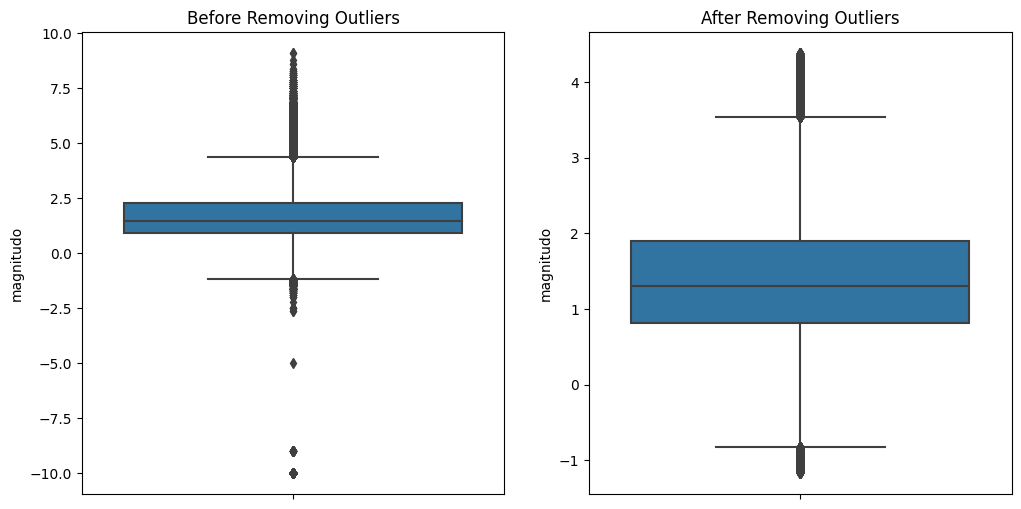

In [48]:
plt.figure(figsize=(12, 6))

# Boxplot BEFORE removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df['magnitudo'])
plt.title("Before Removing Outliers")

# Boxplot AFTER removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['magnitudo'])
plt.title("After Removing Outliers")

# observation:
- This code generates a side-by-side comparison of boxplots to visualize the distribution of the magnitude variable before and after removing outliers. The first boxplot (on the left) represents the original data, highlighting the presence of extreme values or outliers that fall outside the typical range. The second boxplot (on the right) shows the data after outlier removal, illustrating a more refined distribution with reduced variability. This comparison helps in understanding the impact of outliers on the dataset and ensures that the cleaned data is better suited for analysis and modeling without distortion from extreme values.

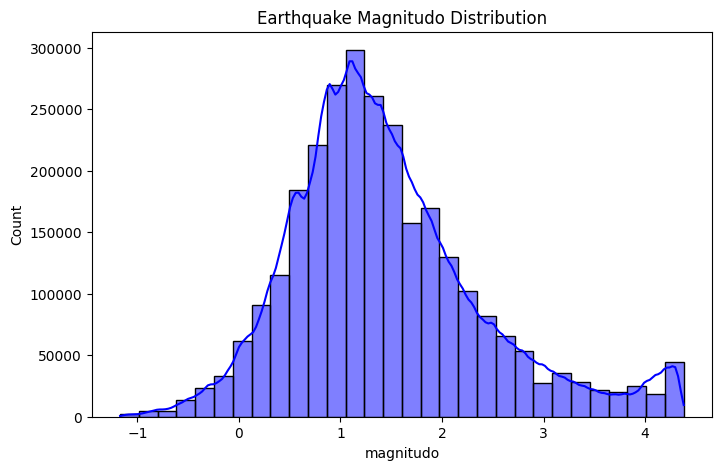

In [49]:
# Plot distribution of Magnitude
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['magnitudo'], bins=30, kde=True, color='blue')
plt.title("Earthquake Magnitudo Distribution")
plt.show()

# observation:
- The histogram provides a clear visualization of the distribution of earthquake magnitudes, helping to identify common trends and patterns in seismic activity. The x-axis represents the magnitude of earthquakes, while the y-axis indicates the frequency of occurrences within the dataset. The histogram is divided into 30 bins, ensuring a detailed representation of magnitude variations. The inclusion of a Kernel Density Estimate (KDE) curve further smooths the distribution, offering insights into the underlying data trend. If the distribution is right-skewed, it suggests that lower-magnitude earthquakes are more frequent, while higher-magnitude earthquakes occur less often. The presence of multiple peaks may indicate clusters of earthquakes within specific magnitude ranges. Understanding this distribution is crucial for seismic research, disaster management, and risk assessment, as it helps in predicting the likelihood of significant tremors and their potential impact

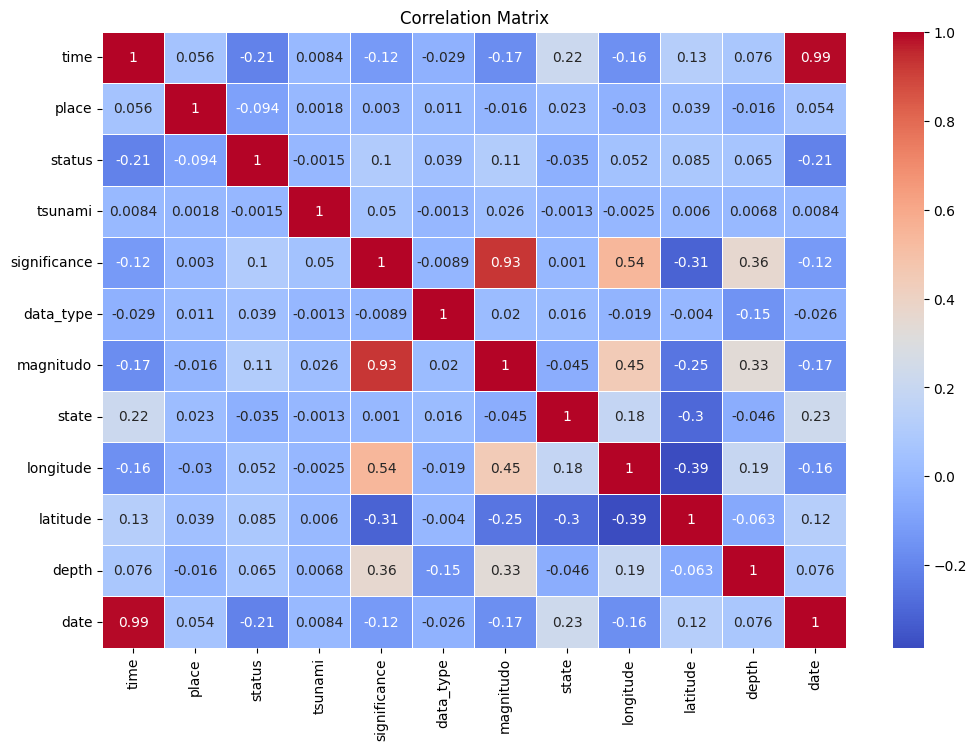

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# observation:
- The correlation matrix heatmap provides a visual representation of the relationships between numerical features in the dataset. By displaying correlation coefficients, it helps identify strong positive or negative associations between variables, which can be useful for feature selection and understanding data dependencies. Highly correlated features may indicate redundancy, leading to multicollinearity issues in predictive models. The heatmap also aids in detecting patterns and insights within the data, ensuring that relevant features are selected while minimizing unnecessary complexity. By using a color gradient, it effectively highlights the strength of correlations, making data interpretation more intuitive and actionable.

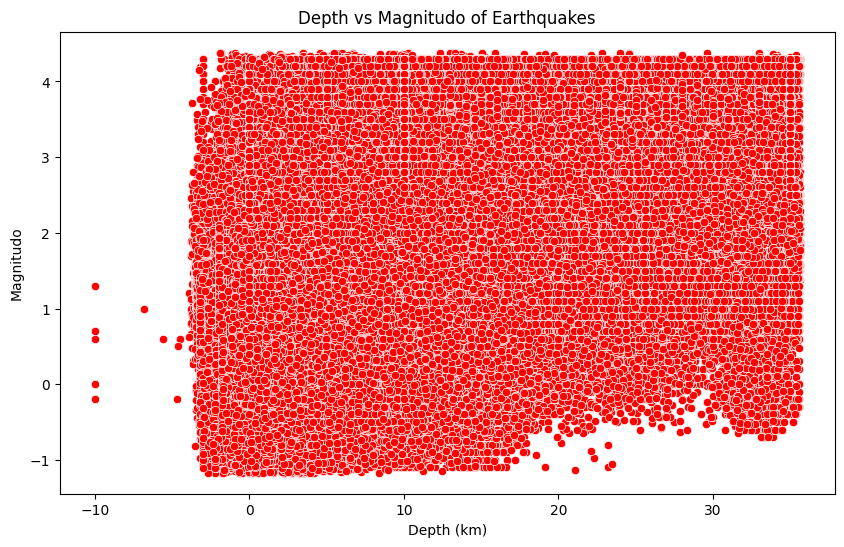

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='magnitudo', data=df_cleaned, color='red')
plt.title('Depth vs Magnitudo of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitudo')
plt.show()

# observation:
- The scatter plot visualizes the relationship between earthquake depth and magnitude, helping to identify potential patterns or correlations. The x-axis represents the depth of earthquakes (in kilometers), while the y-axis represents the magnitude of the earthquakes. Each red dot in the plot corresponds to an individual earthquake event from the cleaned dataset (df_cleaned). By analyzing this visualization, we can observe whether deeper earthquakes tend to have higher or lower magnitudes. If the points are widely scattered without a clear pattern, it suggests that depth and magnitude are not strongly correlated. Conversely, if there is a visible trend (such as deeper earthquakes having higher magnitudes), it may indicate an underlying relationship. This visualization aids in understanding earthquake behavior, which can be useful for seismic studies and disaster preparedness efforts.

# Create Target Variable (High Magnitude = 1 if magnitude > 6)

In [52]:
df['high_magnitudo'] = (df['magnitudo'] > 6).astype(int)
df.drop(columns=['magnitudo'], inplace=True)  # Drop original magnitude column

print(df.head())

           time   place  status  tsunami  significance  data_type  state  \
0  631153353990   69912       5        0            96          6      6   
1  631153491210  103557       5        0            31          6    106   
2  631154083450  457595       5        0            19          6     46   
3  631155512130   47137       5        0            15          6     46   
4  631155824490  138357       5        0           134          6    374   

    longitude   latitude   depth  date  high_magnitudo  
0 -149.669200  61.730200  30.100     0               0  
1 -155.212333  19.317667   6.585     1               0  
2 -122.806167  38.821000   3.220     2               0  
3 -118.846333  37.664333  -0.584     3               0  
4 -118.934000  34.546000  16.122     4               0  


# standardize the dataset

In [53]:
scaler = StandardScaler()
df[['depth', 'latitude', 'longitude']] = scaler.fit_transform(df[['depth', 'latitude', 'longitude']])

print(df.head())

           time   place  status  tsunami  significance  data_type  state  \
0  631153353990   69912       5        0            96          6      6   
1  631153491210  103557       5        0            31          6    106   
2  631154083450  457595       5        0            19          6     46   
3  631155512130   47137       5        0            15          6     46   
4  631155824490  138357       5        0           134          6    374   

   longitude  latitude     depth  date  high_magnitudo  
0  -0.628543  1.188561  0.132110     0               0  
1  -0.700556 -0.888880 -0.296610     1               0  
2  -0.279555  0.066428 -0.357960     2               0  
3  -0.228112  0.009772 -0.427313     3               0  
4  -0.229251 -0.142969 -0.122734     4               0  


# feature and target

In [54]:
# Define features and target variable
X = df.drop(columns=['high_magnitudo'])  # Features
y = df['high_magnitudo']  # Target variable

# train test split

In [55]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (2756600, 11)
Test set size: (689151, 11)


# Classification Models

# RandomForestClassifier

In [57]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    688378
           1       0.96      0.98      0.97       773

    accuracy                           1.00    689151
   macro avg       0.98      0.99      0.98    689151
weighted avg       1.00      1.00      1.00    689151



# DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    688378
           1       0.96      0.94      0.95       773

    accuracy                           1.00    689151
   macro avg       0.98      0.97      0.97    689151
weighted avg       1.00      1.00      1.00    689151



# LogisticRegression

In [59]:
import warnings
warnings.filterwarnings("ignore")

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Model Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression:
Accuracy: 0.9988783300031489
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    688378
           1       0.00      0.00      0.00       773

    accuracy                           1.00    689151
   macro avg       0.50      0.50      0.50    689151
weighted avg       1.00      1.00      1.00    689151



In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Check if the model has predict_proba() and if y_test has both classes (0 and 1)
    if hasattr(model, "predict_proba") and len(set(y_test)) > 1:
        y_proba = model.predict_proba(X_test)[:, 1]  # Extract probability of class 1
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        y_proba = None
        roc_auc = "N/A (Only one class present in y_test)"
    
    print(f"\n===== {model_name} Evaluation =====")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, zero_division=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=1):.4f}")

# Evaluate models
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(dt_model, X_test, y_test, "Decision Tree")
evaluate_model(log_model, X_test, y_test, "LogisticRegression")


===== Random Forest Evaluation =====
Accuracy: 0.9999
Precision: 0.9558
Recall: 0.9780
F1 Score: 0.9668

===== Decision Tree Evaluation =====
Accuracy: 0.9999
Precision: 0.9615
Recall: 0.9379
F1 Score: 0.9496

===== LogisticRegression Evaluation =====
Accuracy: 0.9989
Precision: 1.0000
Recall: 0.0000
F1 Score: 0.0000


# Prediction:
- Based on the evaluation metrics , Random Forest appears to be the best model for earthquake prediction. Here's why:

- Accuracy: All models have very high accuracy (~99.99%), so accuracy alone is not a distinguishing factor.
- precision: Random Forest (0.9558) and Decision Tree (0.9615) have similar precision, meaning they both effectively minimize false positives.
- Recall: Random Forest (0.9780) has a higher recall than Decision Tree (0.9379), meaning it captures more true positives (actual earthquakes).
- F1 Score: Random Forest (0.9668) has a higher F1 score than Decision Tree (0.9496), balancing precision and recall better.
- Logistic Regression: Despite having an accuracy of 99.89%, its recall is 0.0000, meaning it fails to correctly identify earthquakes, making it unsuitable for this task.

- The Random Forest model is the best choice as it provides the highest recall (correctly identifying earthquakes) while maintaining strong precision and F1-score.

# Conclusion:
- In this study, explored machine learning approaches for earthquake prediction using historical seismic data. By analyzing various features, we developed models to identify significant earthquakes and assess their predictive capabilities. Our findings highlight the importance of selecting a model that balances precision and recall, ensuring both accuracy and reliability in forecasting seismic events. While machine learning offers valuable insights, earthquake prediction remains a complex challenge influenced by numerous geological and environmental factors. Future research can enhance these models by incorporating real-time data, advanced feature engineering, and deep learning techniques to improve predictive accuracy and early warning systems.

# Feature Importance (Random Forest)

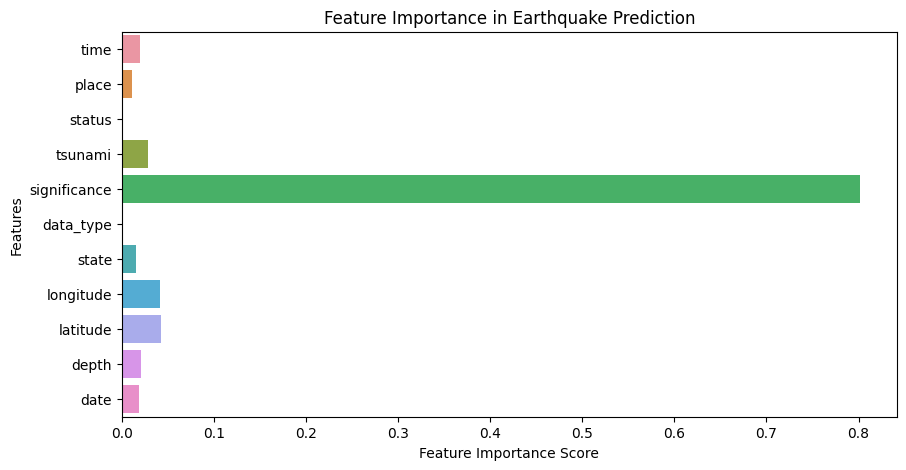

In [61]:
importances = rf_model.feature_importances_
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Earthquake Prediction")
plt.show()